<a href="https://colab.research.google.com/github/Zinwaiyan274/Tesla-Stock-Price-Prediction-using-Facebook-Prophet-model/blob/main/Facebook_Prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Sorce 
https://finance.yahoo.com/quote/TSLA/history?p=TSLA

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-01,683.919983,687.989990,672.799988,677.919983,677.919983,18634500
1,2021-07-02,678.979980,700.000000,673.260010,678.900024,678.900024,27054500
2,2021-07-06,681.710022,684.000000,651.400024,659.580017,659.580017,23284500
3,2021-07-07,664.270020,665.700012,638.320007,644.650024,644.650024,18792000
4,2021-07-08,628.369995,654.429993,620.460022,652.809998,652.809998,22773300


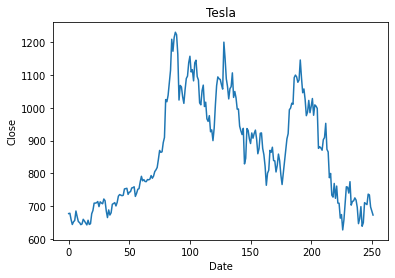

In [18]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [12]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]
date = data["Date"]
date.isnull().sum()

0

In [10]:
close = data["Close"]
close.isnull().sum()

0

In [21]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]


In [31]:
# data = data.rename(columns={"Date" : "ds", "Close" : "y" })
data = data.rename(columns={"Date" : "date", "Close" : "close" })
data.head()

,ds,y
0,2021-07-01,677.919983
1,2021-07-02,678.900024
2,2021-07-06,659.580017
3,2021-07-07,644.650024
4,2021-07-08,652.809998


In [29]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2023-06-26,-367.272794,-869.587577,90.542655
613,2023-06-27,-375.528399,-876.045204,67.380302
614,2023-06-28,-376.296491,-877.412783,83.219205
615,2023-06-29,-385.879037,-874.728000,88.677650
616,2023-06-30,-393.330067,-890.579268,67.124839


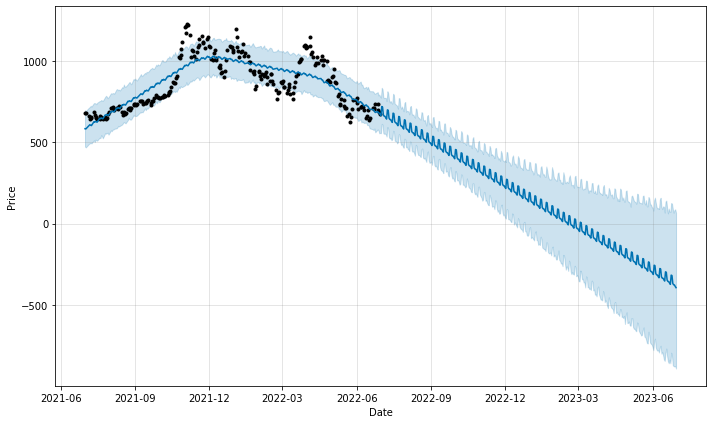

In [30]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

Ref
https://thecleverprogrammer.com/2021/03/27/tesla-stock-price-prediction-with-machine-learning/